For this section we will be using the following packages:

In [1]:
#Check Python Version
import sys
assert(sys.version_info.major==3),print(sys.version)

#Matrices, Dataframe and Plotting Operations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Model Packages for k-NN and Linear Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
import statsmodels.api as sm

#Metrics, Performance Evaluation and Helpful fucntions
from sklearn import metrics, datasets
from collections import Counter

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#Aesthetic settings
from IPython.display import display
pd.set_option('display.max_rows', 999)
pd.set_option('display.width', 500)
pd.set_option('display.notebook_repr_html', True)

## Load in the Bikeshare dataset and perform EDA:

In [2]:
#Load the BikeShare dataset
bikeshare = pd.read_csv('bikeshare.csv')
print("Length of Dataset:",len(bikeshare))
display(bikeshare.head())

Length of Dataset: 731


,MONTH,HOLIDAY,WEEKDAY,WEATHERSIT,TEMP,ATEMP,HUMIDITY,WINDSPEED,CASUAL,REGISTERED,COUNT
0,JANUARY,NO,NO,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,JANUARY,NO,NO,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,JANUARY,NO,YES,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,JANUARY,NO,YES,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,JANUARY,NO,YES,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
display(bikeshare.describe())

,WEATHERSIT,TEMP,ATEMP,HUMIDITY,WINDSPEED,CASUAL,REGISTERED,COUNT
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


We can also use the groupby function to look at mean stats aggregated by month: 

In [4]:
bikeshare.groupby('MONTH').mean()

,WEATHERSIT,TEMP,ATEMP,HUMIDITY,WINDSPEED,CASUAL,REGISTERED,COUNT
MONTH,,,,,,,,
APRIL,1.416667,0.469999,0.457081,0.588063,0.234482,1013.366667,3471.533333,4484.900000
AUGUST,1.306452,0.708582,0.651475,0.637730,0.172918,1161.919355,4502.500000,5664.419355
DECEMBER,1.532258,0.324031,0.326160,0.666041,0.176609,349.887097,3053.919355,3403.806452
FEBRUARY,1.368421,0.299226,0.299731,0.567465,0.215684,262.508772,2392.789474,2655.298246
JANUARY,1.419355,0.236444,0.239796,0.585828,0.206303,194.225806,1982.112903,2176.338710
JULY,1.193548,0.755470,0.704094,0.597876,0.166059,1260.596774,4303.080645,5563.677419
JUNE,1.233333,0.684097,0.638246,0.575806,0.185420,1231.766667,4540.600000,5772.366667
MARCH,1.451613,0.390539,0.381954,0.588475,0.222699,716.838710,2975.419355,3692.258065
MAY,1.403226,0.594798,0.565662,0.688958,0.182989,1214.274194,4135.500000,5349.774194


Let's plot the variation of count with month? Is  there a seasonal change?

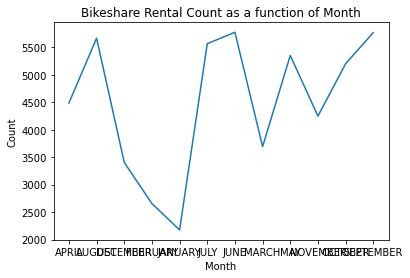

In [5]:
plt.plot(bikeshare.groupby('MONTH').mean()['COUNT'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Bikeshare Rental Count as a function of Month')
plt.show()

Let's have a closer look at the dataframe:

There are multiple ```atemp``` values for each ```temp``` value, which if not sorted will bounce around at the same x-value. Thus, we need to sort both axes simultaneously.

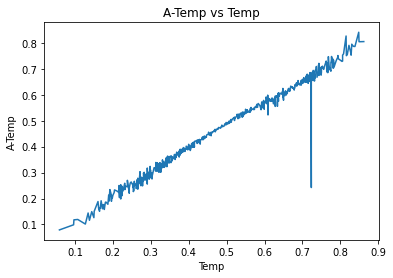

In [7]:
new = bikeshare.sort_values(['TEMP','ATEMP'])
plt.plot(new['TEMP'], new['ATEMP'])
plt.xlabel('Temp')
plt.ylabel('A-Temp')
plt.title('A-Temp vs Temp')
plt.show()

In [8]:
#Function to Split data into Train and Test Set
def split_data(data):
    
    #Calculate Length of Dataset
    length = len(data)
    
    #Define Split
    split = 0.7
    
    #Set a random Seed For Shuffling
    np.random.seed(9001)
    
    #Generate a Mask with a X:Y Split
    mask = np.random.rand(length) < split
    
    #Separate train and test data
    data_train = data[mask]
    data_test = data[~mask]
    
    #Return Separately
    return data_train, data_test

In [9]:

bikeshare.describe()

,WEATHERSIT,TEMP,ATEMP,HUMIDITY,WINDSPEED,CASUAL,REGISTERED,COUNT
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Choose one predictor

In [10]:
bikeshare.columns
bikeshare.iloc[:,0:10].head()

,MONTH,HOLIDAY,WEEKDAY,WEATHERSIT,TEMP,ATEMP,HUMIDITY,WINDSPEED,CASUAL,REGISTERED
0,JANUARY,NO,NO,2,0.344167,0.363625,0.805833,0.160446,331,654
1,JANUARY,NO,NO,2,0.363478,0.353739,0.696087,0.248539,131,670
2,JANUARY,NO,YES,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,JANUARY,NO,YES,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,JANUARY,NO,YES,1,0.226957,0.229270,0.436957,0.186900,82,1518


In [11]:
bikeshare = bikeshare[['TEMP', 'COUNT']]

In [12]:
bikeshare.head()

,TEMP,COUNT
0,0.344167,985
1,0.363478,801
2,0.196364,1349
3,0.200000,1562
4,0.226957,1600


## Split up the data into a training set and a test set:

Now that we have an idea of what the data looks like, we would like to predict count. Therefore, we will be breaking up the data into a **training** and a **testing** set. The **training** set will be used to train the model, while the **testing** set will be used to gauge how well our model does in general. The **testing** set is a way for us to ensure our model doesn't overfit our training data.

Let us first create a function that will randomly split the data up into a 70-30 split, with 70% of the data going into the **testing** set:

In [13]:
#Function to Split data into Train and Test Set
def split_data(data):
    
    #Calculate Length of Dataset
    length = len(data)
    
    #Define Split
    split = 0.7
    
    #Set a random Seed For Shuffling
    np.random.seed(9001)
    
    #Generate a Mask with a X:Y Split
    mask = np.random.rand(length) < split
    
    #Separate train and test data
    data_train = data[mask]
    data_test = data[~mask]
    
    #Return Separately
    return data_train, data_test


In [14]:
#Split data using defined function
train_data, test_data = split_data(bikeshare)
print("Length of Training set:",len(train_data))
print("Length of Testing set:",len(test_data))

Length of Training set: 507
Length of Testing set: 224


In [15]:
## Check that the ratio between test and train sets is right
test_data.shape[0]/(test_data.shape[0]+train_data.shape[0])


0.3064295485636115

In [16]:
train_data.head()

,TEMP,COUNT
0,0.344167,985
3,0.200000,1562
5,0.204348,1606
6,0.196522,1510
9,0.150833,1321


## Alternative approach using Standard 'train_test_split' function from sklearn

In [17]:
train_data, test_data = train_test_split(bikeshare, test_size=0.30, random_state=13)
print("Length of Training set:",len(train_data))
print("Length of Testing set:",len(test_data))

Length of Training set: 511
Length of Testing set: 220


## Implementing the kNN Algorithm by hand:

To really understand how the kNN algorithm works, it helps to go through the algorithm line by line in code.

In [18]:
#kNN Algorithm
def knn_algorithm(train, test, k):
    
    #Create any empty list to store our predictions in
    predictions = []
    
    #Separate the response and predictor variables from training and test set:
    train_x = train['TEMP']
    train_y = train['COUNT']
    test_x  = test['TEMP']
    test_y  = test['COUNT']
    
    for i, ele in enumerate(test_x):
        
        #For each test point, store the distance between all training points and test point
        distances = pd.DataFrame((train_x.values - ele)**2 , index=train.index)
        distances.columns =['dist']
        
        #display(distances)
        #Then, we sum across the columns per row to obtain the Euclidean distance squared
        ##distances = vec_distances.sum(axis = 1)
        
        #Sort the distances to training points (in ascending order) and take first k points
        nearest_k = distances.sort_values(by='dist').iloc[:k]
        
        #For simplicity, we omitted the square rooting of the Euclidean distance because the
        #square root function preserves order. 
        
        #Take the mean of the y-values of training set corresponding to the nearest k points
        k_mean = train_y[nearest_k.index].mean()
        
        #Add on the mean to our predicted y-value list
        predictions.append(k_mean)
    
 
    
    #Create a dataframe with the x-values from test and predicted y-values  
    predict = test.copy()  
    predict['PREDICTED_COUNT'] = pd.Series(predictions, index=test.index)
    
    return predict

Now to run the algorithm on our dataset with $k = 5$:

In [19]:
#Run the kNN function 

k = 5
predicted_knn = knn_algorithm(train_data, test_data, k)
predicted_knn.head()

,TEMP,COUNT,PREDICTED_COUNT
114,0.606667,4073,6164.0
260,0.507500,4274,5012.0
58,0.407273,1446,3827.8
294,0.422500,4308,3784.6
511,0.692500,6536,5965.6


We want to have a way to evaluate our predictions from the kNN algorithm with $k=5$. One way is to compute the $R^2$ coefficient. Let's create a function for that:

In [20]:
#Test predictions in comparison to true value of test set
def evaluate(predicted, true):
    
    #Find the squared error:
    squared_error = (predicted['PREDICTED_COUNT'] - true['COUNT'])**2
    
    #Finding the mean squared error:
    error_var = squared_error.sum()
    sample_var = ((true['COUNT'] - true['COUNT'].mean())**2).sum()
    r = (1 - (error_var / sample_var))
    return r

Then let's apply this function to our predictions:

In [21]:
print("Length of Test Data:",len(test_data))
print("R^2 Score of kNN - test:", evaluate(predicted_knn, test_data))

Length of Test Data: 220
R^2 Score of kNN - test: 0.3915500386597568


In [22]:
predicted_knn_train = knn_algorithm(train_data, train_data, k)

print("R^2 Score of kNN - train:", evaluate(predicted_knn_train, train_data))

R^2 Score of kNN - train: 0.5877168018166972


## Now using sklearn to implement kNN:

We will now use the **sklearn** package to implement kNN. Then, we can fit the model and use various metrics to assess our accuracy.

**What is sklearn?**

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.

It is licensed under a permissive simplified BSD license and is distributed under many Linux distributions, encouraging academic and commercial use. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn. This stack that includes:

* NumPy: Base n-dimensional array package
* SciPy: Fundamental library for scientific computing
* Matplotlib: Comprehensive 2D/3D plotting
* IPython: Enhanced interactive console
* Sympy: Symbolic mathematics
* Pandas: Data structures and analysis
* Extensions or modules for SciPy care conventionally named SciKits. As such, the module provides learning algorithms and is named scikit-learn.

The vision for the library is a level of robustness and support required for use in production systems. This means a deep focus on concerns such as easy of use, code quality, collaboration, documentation and performance.

**General sklearn model fitting code-structure :**

```
#Split Data into Train and Test Set
x_train, y_train = training_data.drop('Response_Variable', axis=1), training_data['Response_Variable']
x_test, y_test = test_data.drop('Response_Variable', axis=1), test_data['Response_Variable']

#Define Model
model = sklearn_model_name(hyper_parameter1 = value1, hyper_parameter2 = value2)

#Fit Model
model.fit(x_train, y_train)

#Get Prediction
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#Evaluate Model
r2_train = model.score(y_train, y_pred_train)
r2_test = model.score(y_test, y_pred_test)

#Print Results
print("Score for Model (Training):", r2_train)
print("Score for Model (Testing) :", r2_test)
```

* Every model has a list of hyperparameters that can be set using sklearn for the specific problem. In practice it is advisable to cross-validate a list of values to find best model fit.

* ```model.fit``` calculates the parameters of your model corresponding to the training data and hyperparameters you provided.

* ```model.predict(X)``` is the standard method called to make the model predict values for a specific X. Depending on if you feed x_train or x_test, you will get a y_prediction_train or y_prediction_test respectively.

* Evaluation of model can vary according to the task at hand i.e. Regression or Classification. For Regression, $R^2$ Score is standard while for Classification, Accuracy (%) is standard.

In [23]:
# Set kNN parameter:
k = 100

# Now we can fit the model, predict our variable of interest, and then evaluate our fit:
# First, we create the classifier object:
neighbors = KNeighborsRegressor(n_neighbors=k)

# Then, we fit the model using x_train as training data and y_train as target values:
neighbors.fit(train_data[['TEMP']], train_data['COUNT'])

# Retreieve our predictions:
prediction_knn = neighbors.predict(test_data[['TEMP']])

# This returns the mean accuracy on the given test data and labels, or in other words, 
# the R squared value -- A constant model that always predicts the expected value of y, 
# disregarding the input features, would get a R^2 score of 1.
r2_train = neighbors.score(train_data[['TEMP']], train_data['COUNT'])
r2_test = neighbors.score(test_data[['TEMP']], test_data['COUNT'])
print("Length of Test Data:", len(test_data['COUNT']))
print("R^2 Score of kNN on test set:", r2_test)
print("R^2 Score of kNN on training set:", r2_train)


Length of Test Data: 220
R^2 Score of kNN on test set: 0.4181813261023676
R^2 Score of kNN on training set: 0.4679014366273957


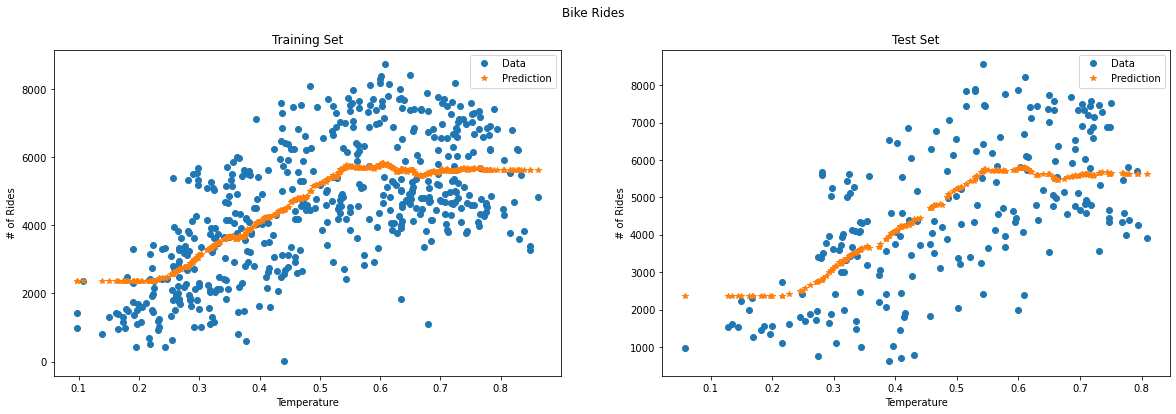

In [24]:
# SubPlots

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
#axes[0].set_xlim([0.5, 0.7])
axes[0].plot(train_data['TEMP'], train_data['COUNT'], 'o', label = 'Data' )#, '*',  label='Predicted')
axes[0].plot(train_data['TEMP'], neighbors.predict(train_data[['TEMP']]), '*', label = 'Prediction')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('# of Rides')
axes[0].set_title("Training Set")
axes[0].legend()

axes[1].plot(test_data['TEMP'], test_data['COUNT'],'o', label = 'Data' )#, '*')
axes[1].plot(test_data['TEMP'], prediction_knn, '*', label = 'Prediction')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('# of Rides')
axes[1].set_title("Test Set")
axes[1].legend()

fig.suptitle("Bike Rides");



# Linear Regression

We just went over the kNN prediction method. Now, we will fit the same data, but Linear Regression. We will use a the same training/testing dataset as before and create our linear regression objects.

In [25]:
#Split Data into X,Y
x_train, y_train = train_data.drop(['COUNT'],axis=1), train_data['COUNT']
x_test, y_test = test_data.drop(['COUNT'],axis=1), test_data['COUNT']

#Add constant
x_train_ca = sm.add_constant(x_train)
x_test_ca = sm.add_constant(x_test)

StatsModels use a Y followed by X structure while feeding data in contrast to sklearn that uses X followed by Y.

In [26]:
#We must first create the linear regression object from stats model

model = sm.OLS(y_train, x_train_ca)
results = model.fit()
print(results.params)

const    1267.278651
TEMP     6511.381837
dtype: float64


Now, we will compute metrics that can be used to assess fit.

**Note: sklearn.metrics is class of functions that consists of all the metrics we care about to evaluate our models. While it is not hard to implement them yourself, it is helpful to go through http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.**

In [27]:
#To compute the mean squared error (notice that we are now using the TEST set):
print("R^2 Score for Linear Regression (Training):", metrics.r2_score(y_train, results.predict(x_train_ca)))
print("R^2 Score for Linear Regression (Testing) :", metrics.r2_score(y_test, results.predict(x_test_ca)))

R^2 Score for Linear Regression (Training): 0.39222208234122624
R^2 Score for Linear Regression (Testing) : 0.3966293992436889


In [28]:
#Find the squared error:
y_pred_train = results.predict(x_train_ca)
squared_error_train = (y_pred_train - y_train)**2
 #Finding the mean squared error:
error_var_train = squared_error_train.mean()

sample_var_train = ((y_train - y_train.mean())**2).mean()



y_pred_test = results.predict(x_test_ca)
squared_error_test = (y_pred_test - y_test)**2
 #Finding the mean squared error:
error_var_test = squared_error_test.mean()

sample_var_test = ((y_test - y_test.mean())**2).mean()

print(error_var_train, sample_var_train, 1 - error_var_train/sample_var_train)
print(error_var_test, sample_var_test, 1 - error_var_test/sample_var_test)


2266397.894666224 3728990.1933203414 0.3922220823412267
2287373.262556253 3790992.235433881 0.39662939924368856


In [ ]:
results.summary()

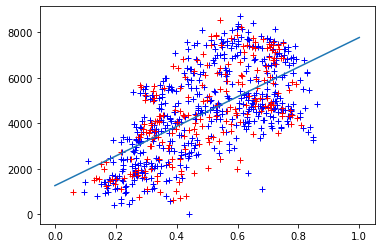

In [29]:
plt.plot(x_train, y_train, 'b+')
plt.plot(x_test, y_test, 'r+')

x_forpredict = np.linspace(0,1, 100)
line_y = results.predict(sm.add_constant(x_forpredict))
plt.plot(x_forpredict, line_y)